This Is a legacy notebook. It was acheieved after a really long stragle and 
we know that it works for sure with the "env" environment on gil's machine.
DO NOT ALTER IT! 
ISNTEAD COPY AND WORK IN ANOTHER NOTEBOOK!!!

In [ ]:
import numpy as np 
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
import keras
import cv2
import matplotlib.pyplot as plt
from focal_loss import BinaryFocalLoss

Segmentation Models: using `tf.keras` framework.


In [2]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [3]:
def load_pahts(baseDir):
    img_paths = os.listdir(os.path.join('data','CamVid', baseDir))
    img_paths = [os.path.join('data','CamVid', baseDir, img_path) for img_path in img_paths]
    img_paths.sort()
    print(img_paths)
    return img_paths
    

In [4]:
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        plt.imshow(img)
        images.append(img)
    return np.array(images)


In [5]:
def load_masks(mask_paths):
    masks = []
    for path in mask_paths:
        mask = cv2.imread(path)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = cv2.resize(mask, (256, 256))
        mask = np.expand_dims(mask, axis=-1)
        mask = np.where(mask>0, 1, 0)
        masks.append(mask)
    return np.array(masks)

In [6]:
def plot_image_mask_result(x, y, z=None):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    axs[0].imshow(x)
    axs[1].imshow(y, cmap='gray')
    axs[2].imshow( np.zeros(x.shape) if z is None else z, cmap='gray')
    plt.show()

In [7]:
x_train_path = load_pahts('train')
y_train_path = load_pahts('trainannot')
x_val_path = load_pahts('val')
y_val_path = load_pahts('valannot')
x_test_path = load_pahts('test')
y_test_path = load_pahts('testannot')

['data/CamVid/train/0001TP_006690.png', 'data/CamVid/train/0001TP_006720.png', 'data/CamVid/train/0001TP_006750.png', 'data/CamVid/train/0001TP_006780.png', 'data/CamVid/train/0001TP_006810.png', 'data/CamVid/train/0001TP_006840.png', 'data/CamVid/train/0001TP_006870.png', 'data/CamVid/train/0001TP_006900.png', 'data/CamVid/train/0001TP_006930.png', 'data/CamVid/train/0001TP_006960.png', 'data/CamVid/train/0001TP_006990.png', 'data/CamVid/train/0001TP_007020.png', 'data/CamVid/train/0001TP_007050.png', 'data/CamVid/train/0001TP_007080.png', 'data/CamVid/train/0001TP_007110.png', 'data/CamVid/train/0001TP_007140.png', 'data/CamVid/train/0001TP_007170.png', 'data/CamVid/train/0001TP_007200.png', 'data/CamVid/train/0001TP_007230.png', 'data/CamVid/train/0001TP_007260.png', 'data/CamVid/train/0001TP_007290.png', 'data/CamVid/train/0001TP_007320.png', 'data/CamVid/train/0001TP_007350.png', 'data/CamVid/train/0001TP_007380.png', 'data/CamVid/train/0001TP_007410.png', 'data/CamVid/train/0001T

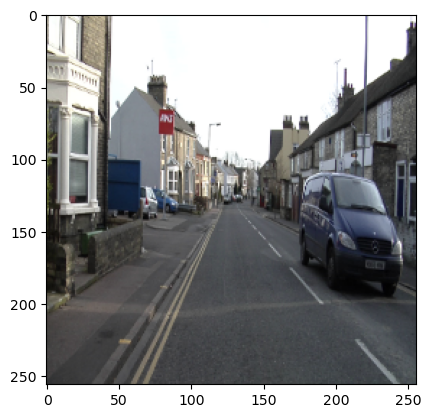

In [8]:
y_train = load_masks(y_train_path)
x_train = load_images(x_train_path)
y_val = load_masks(y_val_path)
x_val = load_images(x_val_path)
y_test = load_masks(y_test_path)
x_test = load_images(x_test_path)

In [9]:
model = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=1, activation='sigmoid', input_shape=(256, 256, 3))

In [10]:
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [11]:
model.compile('Adam', loss=BinaryFocalLoss(gamma=2), metrics=metrics)

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 256, 256, 3)          9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

In [15]:
import keras.callbacks

model.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=50,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/50


KeyboardInterrupt: 

In [30]:
evaluation = model.evaluate(x_test, y_test)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

8/8 [==============================] - 12s 2s/step - loss: 0.0136 - iou_score: 0.9789 - f1-score: 0.9893
Loss: 0.013635724782943726
Accuracy: 0.9789270758628845


['data/CamVid/test/0001TP_009030.png', 'data/CamVid/test/0001TP_009540.png', 'data/CamVid/test/Seq05VD_f03270.png', 'data/CamVid/test/0001TP_009420.png', 'data/CamVid/test/Seq05VD_f00180.png', 'data/CamVid/test/0001TP_009150.png', 'data/CamVid/test/Seq05VD_f03660.png', 'data/CamVid/test/0001TP_009810.png', 'data/CamVid/test/Seq05VD_f02580.png', 'data/CamVid/test/Seq05VD_f01710.png', 'data/CamVid/test/0001TP_009390.png', 'data/CamVid/test/Seq05VD_f01260.png', 'data/CamVid/test/0001TP_010170.png', 'data/CamVid/test/Seq05VD_f00630.png', 'data/CamVid/test/0001TP_008850.png', 'data/CamVid/test/Seq05VD_f02190.png', 'data/CamVid/test/Seq05VD_f00750.png', 'data/CamVid/test/0001TP_009780.png', 'data/CamVid/test/Seq05VD_f04050.png', 'data/CamVid/test/Seq05VD_f03930.png', 'data/CamVid/test/Seq05VD_f01470.png', 'data/CamVid/test/Seq05VD_f04440.png', 'data/CamVid/test/Seq05VD_f05010.png', 'data/CamVid/test/Seq05VD_f02970.png', 'data/CamVid/test/Seq05VD_f01920.png', 'data/CamVid/test/Seq05VD_f04680.

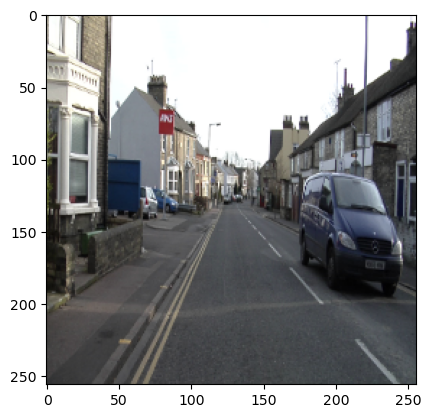

In [38]:
THRESHOLD = 0.5
prediction = model.predict(x_test)

prediction = np.where(prediction > THRESHOLD, 1, 0)

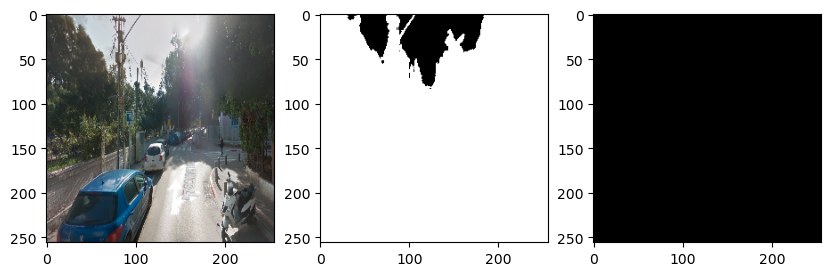

In [39]:
index = np.random.randint(0, x_test.shape[0])
plot_image_mask_result(x_test[index], y_test[index], prediction[index])

In [35]:
def save_model(model,model_params, name=None):
    import json
    from datetime import datetime
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")
    if name is None:
        name = "model" + current_time
    with open("report_" + name + ".json", 'w') as file:
        json.dump(model_params, file, indent=4)
    model.save(name + ".h5")
    
    
params={
    'model': 'Unet',
    'backbone': BACKBONE,
    'image_resize': '256X256',
    'epochs' : '16/50',
    'Loss': 0.013635724782943726,
    'Accuracy': 0.9789270758628845
}
save_model(model,params)

/Users/gilpasi/Desktop/Train/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
